In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from preprocessing_functions import *

images_pid, images_image, images_label, images_mask = read_images_to_array('data/images/')
images_label_string = convert_labels_to_strings(images_label)

1070.mat
1071.mat
1072.mat
1073.mat
1074.mat
1075.mat
1076.mat
1203.mat
1204.mat
1205.mat
1206.mat
1207.mat
955.mat
956.mat
957.mat


# normalization min-max

In [2]:
min_val = np.min(images_image)
print(min_val)

0


In [3]:
max_val = np.max(images_image)
print(max_val)

12728


In [4]:
images_image = (images_image - min_val) / (max_val - min_val)

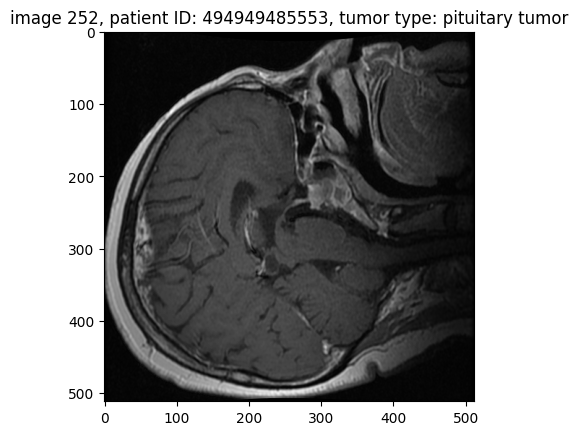

In [5]:
plot_image(252, images_pid, images_image, images_label_string, images_mask,
           show_mask = False)

# train - test split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_image, images_label,
                                                    test_size = 0.20, random_state = 42, shuffle = True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2439, 512, 512) (610, 512, 512) (2439,) (610,)


In [7]:
X_val = X_train[:610]
X_train = X_train[610:]

y_val = y_train[:610]
y_train = y_train[610:]

print(X_val.shape, X_train.shape, y_val.shape, y_train.shape)

(610, 512, 512) (1829, 512, 512) (610,) (1829,)


In [8]:
X_train = X_train.reshape(X_train.shape[0], 512*512)
X_val = X_val.reshape(X_val.shape[0], 512*512)
X_test = X_test.reshape(X_test.shape[0], 512*512)

In [9]:
X_test.shape

(610, 262144)

In [10]:
X_train.shape

(1829, 262144)

# labels to one hot encoding

In [11]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_train.shape, y_val.shape, y_test.shape)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
(1829, 3) (610, 3) (610, 3)


# testing simple networks

In [14]:
# import keras
#
# model1 = keras.Sequential()
# model1.add(keras.layers.Dense(512, activation = 'relu'))
# model1.add(keras.layers.Dense(256, activation = 'relu'))
# model1.add(keras.layers.Dense(64, activation = 'relu'))
# model1.add(keras.layers.Dense(3, activation = 'softmax'))
#
# model1.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
#
# history1 = model1.fit(X_train, y_train, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
58/58 [==============================] - 62s 1s/step - loss: 2.6462 - accuracy: 0.5358 - val_loss: 1.6099 - val_accuracy: 0.6262
Epoch 2/50
58/58 [==============================] - 56s 954ms/step - loss: 0.8197 - accuracy: 0.6331 - val_loss: 0.6750 - val_accuracy: 0.7098
Epoch 3/50
58/58 [==============================] - 55s 951ms/step - loss: 0.7006 - accuracy: 0.6878 - val_loss: 0.5724 - val_accuracy: 0.7295
Epoch 4/50
58/58 [==============================] - 57s 983ms/step - loss: 0.5917 - accuracy: 0.7179 - val_loss: 0.6055 - val_accuracy: 0.7033
Epoch 5/50
58/58 [==============================] - 57s 980ms/step - loss: 0.6332 - accuracy: 0.7283 - val_loss: 0.5593 - val_accuracy: 0.7393
Epoch 6/50
58/58 [==============================] - 56s 970ms/step - loss: 0.5236 - accuracy: 0.7463 - val_loss: 0.8723 - val_accuracy: 0.4787
Epoch 7/50
58/58 [==============================] - 55s 948ms/step - loss: 0.5284 - accuracy: 0.7343 - val_loss: 0.5181 - val_accuracy: 0.7672
Ep

In [20]:
def makeGraph(history_dict, fname):
  train_values = history_dict[fname]
  val_values = history_dict[f"val_{fname}"]
  epochs = range(1, len(val_values) + 1)
  plt.plot(epochs, train_values, label = f"training {fname}")
  plt.plot(epochs, val_values, label = f"validation {fname}")
  plt.xticks(epochs)
  plt.grid(True)
  plt.legend()

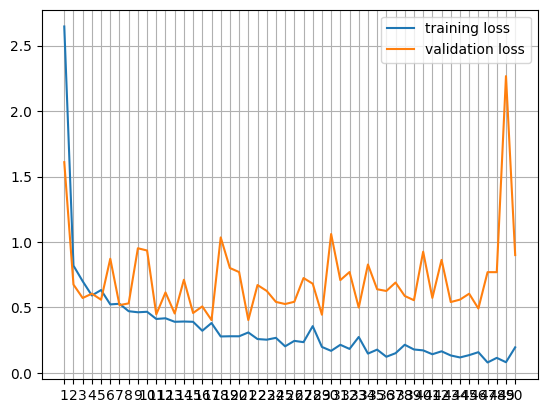

In [18]:
# makeGraph(history1.history, "loss")

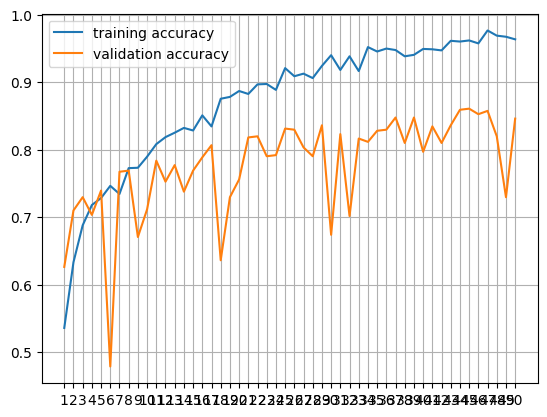

In [19]:
# makeGraph(history1.history, "accuracy")

In [29]:
# model1.evaluate(X_test, y_test)

20/20 [==============================] - 4s 84ms/step - loss: 0.7627 - accuracy: 0.8689


[0.7626984119415283, 0.868852436542511]

In [24]:
# model2 = keras.Sequential()
# model2.add(keras.layers.Dense(512, activation = 'relu'))
# model2.add(keras.layers.Dropout(rate = 0.25))
# model2.add(keras.layers.Dense(256, activation = 'relu'))
# model2.add(keras.layers.Dropout(rate = 0.25))
# model2.add(keras.layers.Dense(128, activation = 'relu'))
# model2.add(keras.layers.Dense(64, activation = 'relu'))
# model2.add(keras.layers.Dense(3, activation = 'softmax'))
#
# model2.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
#
# history2 = model2.fit(X_train, y_train, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
58/58 [==============================] - 64s 1s/step - loss: 1.8167 - accuracy: 0.5161 - val_loss: 0.9095 - val_accuracy: 0.4164
Epoch 2/50
58/58 [==============================] - 55s 944ms/step - loss: 0.7879 - accuracy: 0.6588 - val_loss: 0.6406 - val_accuracy: 0.7000
Epoch 3/50
58/58 [==============================] - 56s 962ms/step - loss: 0.7277 - accuracy: 0.6823 - val_loss: 0.7086 - val_accuracy: 0.7000
Epoch 4/50
58/58 [==============================] - 63s 1s/step - loss: 0.6912 - accuracy: 0.6966 - val_loss: 0.8676 - val_accuracy: 0.5902
Epoch 5/50
58/58 [==============================] - 60s 1s/step - loss: 0.6455 - accuracy: 0.7037 - val_loss: 0.7348 - val_accuracy: 0.6377
Epoch 6/50
58/58 [==============================] - 59s 1s/step - loss: 0.6304 - accuracy: 0.7201 - val_loss: 0.8024 - val_accuracy: 0.6311
Epoch 7/50
58/58 [==============================] - 57s 988ms/step - loss: 0.6143 - accuracy: 0.7266 - val_loss: 0.5658 - val_accuracy: 0.7213
Epoch 8/50


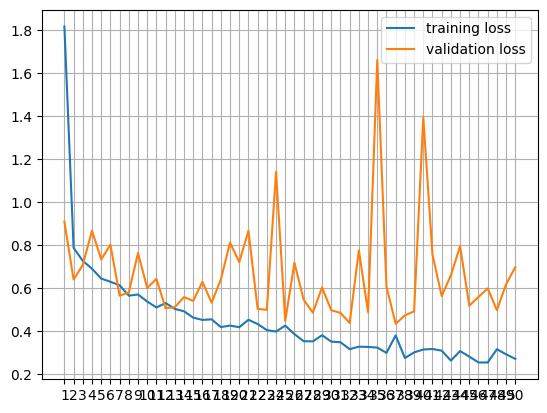

In [27]:
# makeGraph(history2.history, "loss")

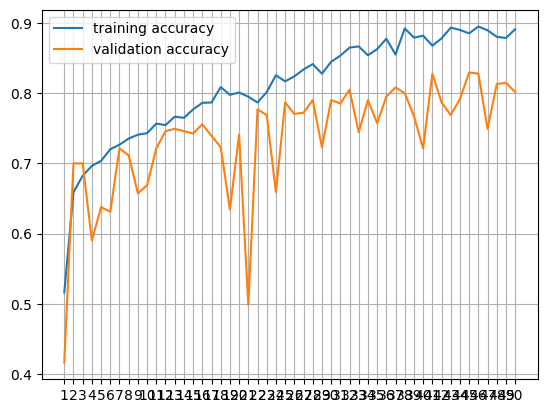

In [28]:
# makeGraph(history2.history, "accuracy")

In [30]:
# model2.evaluate(X_test, y_test)

20/20 [==============================] - 2s 87ms/step - loss: 0.6345 - accuracy: 0.8180


[0.6345434188842773, 0.8180328011512756]

# convolutional networks

In [12]:
X_train.shape

(1829, 262144)

In [13]:
X_train = X_train.reshape(1829, 512, 512, 1)
X_train.shape

(1829, 512, 512, 1)

In [14]:
X_val = X_val.reshape(610, 512, 512, 1)
X_val.shape

(610, 512, 512, 1)

In [15]:
X_test = X_test.reshape(610, 512, 512, 1)
X_test.shape

(610, 512, 512, 1)

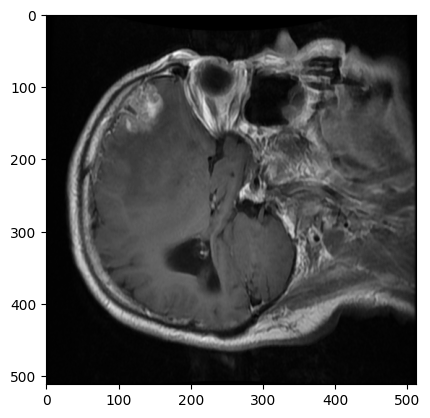

In [40]:
plt.imshow(X_train[2], cmap = 'gray')

In [17]:
import keras


inputs = keras.Input(shape = (512, 512, 1))

hidden = keras.layers.Conv2D(filters = 32, kernel_size = 8, activation = "relu")(inputs)
hidden = keras.layers.MaxPooling2D(pool_size = 2)(hidden)
hidden = keras.layers.Conv2D(filters = 64, kernel_size = 8, activation = "relu")(hidden)
hidden = keras.layers.MaxPooling2D(pool_size = 2)(hidden)
hidden = keras.layers.Conv2D(filters = 128, kernel_size = 4, activation = "relu")(hidden)
hidden = keras.layers.Flatten()(hidden)

outputs = keras.layers.Dense(3, activation = "softmax")(hidden)

model3 = keras.Model(inputs = inputs, outputs = outputs)
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 505, 505, 32)      2080      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 252, 252, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 245, 245, 64)      131136    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 122, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 119, 119, 128)     131200

In [18]:
model3.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
history3 = model3.fit(X_train, y_train, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
58/58 [==============================] - 921s 16s/step - loss: 1.2552 - accuracy: 0.5418 - val_loss: 0.9406 - val_accuracy: 0.6197
Epoch 2/50
58/58 [==============================] - 890s 15s/step - loss: 0.7320 - accuracy: 0.6741 - val_loss: 0.6279 - val_accuracy: 0.7131
Epoch 3/50
58/58 [==============================] - 888s 15s/step - loss: 0.6004 - accuracy: 0.7425 - val_loss: 1.5630 - val_accuracy: 0.7213
Epoch 4/50
58/58 [==============================] - 889s 15s/step - loss: 0.5180 - accuracy: 0.7928 - val_loss: 0.5707 - val_accuracy: 0.7328
Epoch 5/50
58/58 [==============================] - 888s 15s/step - loss: 0.3709 - accuracy: 0.8507 - val_loss: 0.5392 - val_accuracy: 0.7852
Epoch 6/50
58/58 [==============================] - 889s 15s/step - loss: 0.2844 - accuracy: 0.8879 - val_loss: 0.3608 - val_accuracy: 0.8393
Epoch 7/50
58/58 [==============================] - 889s 15s/step - loss: 0.2143 - accuracy: 0.9202 - val_loss: 0.3866 - val_accuracy: 0.8475
Epoch 

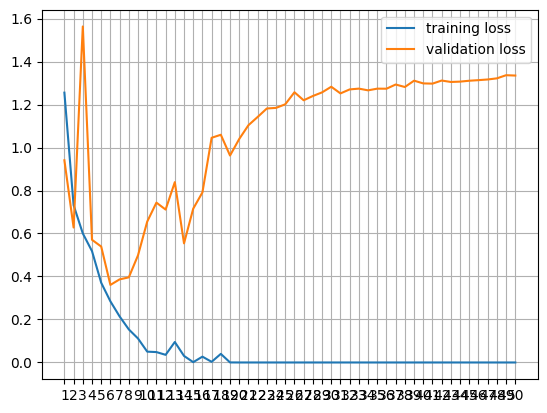

In [21]:
makeGraph(history3.history, "loss")

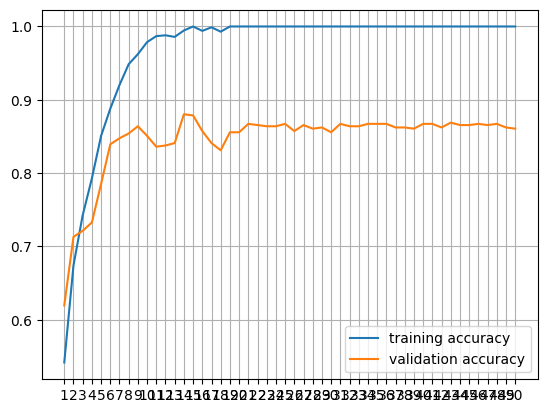

In [22]:
makeGraph(history3.history, "accuracy")

In [50]:
model3.evaluate(X_test, y_test)

20/20 [==============================] - 37s 2s/step - loss: 1.0637 - accuracy: 0.9000


[1.063707947731018, 0.8999999761581421]

In [41]:
X_train_es = np.concatenate((X_train, X_val))
y_train_es = np.concatenate((y_train, y_val))
print(X_train_es.shape, y_train_es.shape)

(2439, 512, 512, 1) (2439, 3)


In [42]:
inputs = keras.Input(shape = (512, 512, 1))

hidden = keras.layers.Conv2D(filters = 32, kernel_size = 8, activation = "relu")(inputs)
hidden = keras.layers.MaxPooling2D(pool_size = 2)(hidden)
hidden = keras.layers.Conv2D(filters = 64, kernel_size = 8, activation = "relu")(hidden)
hidden = keras.layers.MaxPooling2D(pool_size = 2)(hidden)
hidden = keras.layers.Conv2D(filters = 128, kernel_size = 4, activation = "relu")(hidden)
hidden = keras.layers.Flatten()(hidden)

outputs = keras.layers.Dense(3, activation = "softmax")(hidden)

model4 = keras.Model(inputs = inputs, outputs = outputs)
model4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 1)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 505, 505, 32)      2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 252, 252, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 245, 245, 64)      131136    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 122, 122, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 119, 119, 128)     1312

In [43]:
model4.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
history4 = model4.fit(X_train_es, y_train_es, epochs = 9)

Epoch 1/9
77/77 [==============================] - 1086s 14s/step - loss: 1.1987 - accuracy: 0.5650
Epoch 2/9
77/77 [==============================] - 1113s 14s/step - loss: 0.7534 - accuracy: 0.6855
Epoch 3/9
77/77 [==============================] - 1116s 14s/step - loss: 0.5581 - accuracy: 0.7532
Epoch 4/9
77/77 [==============================] - 1120s 15s/step - loss: 0.3725 - accuracy: 0.8549
Epoch 5/9
77/77 [==============================] - 1127s 15s/step - loss: 0.2269 - accuracy: 0.9139
Epoch 6/9
77/77 [==============================] - 1128s 15s/step - loss: 0.2128 - accuracy: 0.9323
Epoch 7/9
77/77 [==============================] - 1133s 15s/step - loss: 0.1041 - accuracy: 0.9582
Epoch 8/9
77/77 [==============================] - 1131s 15s/step - loss: 0.0680 - accuracy: 0.9762
Epoch 9/9
77/77 [==============================] - 1132s 15s/step - loss: 0.0289 - accuracy: 0.9902


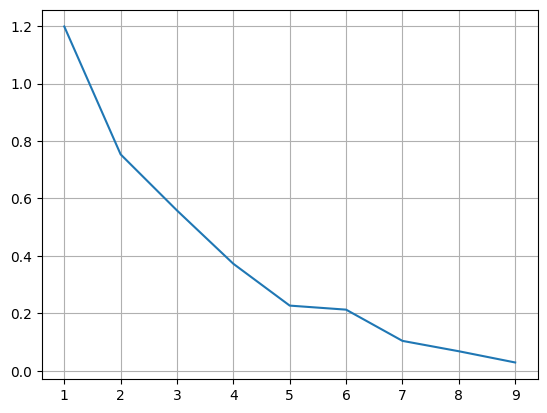

In [47]:
train_values = history4.history["loss"]
epochs = range(1, 10)
plt.plot(epochs, train_values, label = f"training loss")
plt.xticks(epochs)
plt.grid(True)

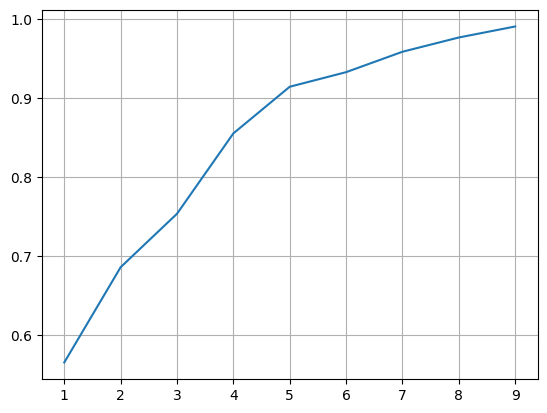

In [48]:
train_values = history4.history["accuracy"]
epochs = range(1, 10)
plt.plot(epochs, train_values, label = f"training accuracy")
plt.xticks(epochs)
plt.grid(True)

In [49]:
model4.evaluate(X_test, y_test)

20/20 [==============================] - 37s 2s/step - loss: 0.6223 - accuracy: 0.8738


[0.6223490834236145, 0.8737704753875732]

In [55]:
inputs = keras.Input(shape = (512, 512, 1))

hidden = keras.layers.Conv2D(filters = 32, kernel_size = 8, activation = "relu")(inputs)
hidden = keras.layers.AveragePooling2D(pool_size = 2)(hidden)
hidden = keras.layers.Conv2D(filters = 64, kernel_size = 8, activation = "relu")(hidden)
hidden = keras.layers.AveragePooling2D(pool_size = 2)(hidden)
hidden = keras.layers.Conv2D(filters = 128, kernel_size = 4, activation = "relu")(hidden)
hidden = keras.layers.AveragePooling2D(pool_size = 2)(hidden)
hidden = keras.layers.Flatten()(hidden)

outputs = keras.layers.Dense(3, activation = "softmax")(hidden)

model5 = keras.Model(inputs = inputs, outputs = outputs)
model5.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
history5 = model5.fit(X_train_es, y_train_es, epochs = 9)

Epoch 1/9
77/77 [==============================] - 1062s 14s/step - loss: 0.8472 - accuracy: 0.6302
Epoch 2/9
77/77 [==============================] - 1081s 14s/step - loss: 0.6104 - accuracy: 0.7142
Epoch 3/9
77/77 [==============================] - 1091s 14s/step - loss: 0.5647 - accuracy: 0.7409
Epoch 4/9
77/77 [==============================] - 1086s 14s/step - loss: 0.4550 - accuracy: 0.8020
Epoch 5/9
77/77 [==============================] - 1090s 14s/step - loss: 0.3389 - accuracy: 0.8647
Epoch 6/9
77/77 [==============================] - 1068s 14s/step - loss: 0.2419 - accuracy: 0.8995
Epoch 7/9
77/77 [==============================] - 1069s 14s/step - loss: 0.1786 - accuracy: 0.9295
Epoch 8/9
77/77 [==============================] - 1096s 14s/step - loss: 0.1163 - accuracy: 0.9594
Epoch 9/9
77/77 [==============================] - 1093s 14s/step - loss: 0.0940 - accuracy: 0.9684


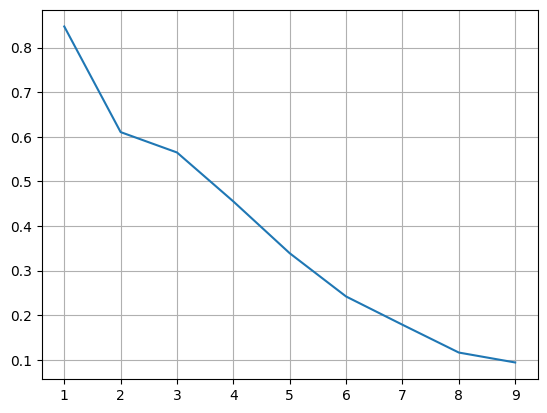

In [56]:
train_values = history5.history["loss"]
epochs = range(1, 10)
plt.plot(epochs, train_values, label = f"training loss")
plt.xticks(epochs)
plt.grid(True)

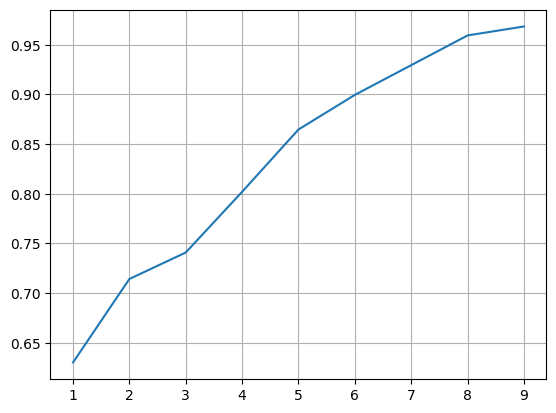

In [57]:
train_values = history5.history["accuracy"]
epochs = range(1, 10)
plt.plot(epochs, train_values, label = f"training accuracy")
plt.xticks(epochs)
plt.grid(True)

In [59]:
model5.evaluate(X_test, y_test)

20/20 [==============================] - 39s 2s/step - loss: 0.4396 - accuracy: 0.8607


[0.4396192133426666, 0.8606557250022888]

In [61]:
inputs = keras.Input(shape = (512, 512, 1))

hidden = keras.layers.Conv2D(filters = 32, kernel_size = 8, activation = "relu")(inputs)
hidden = keras.layers.MaxPooling2D(pool_size = 2)(hidden)
hidden = keras.layers.Conv2D(filters = 64, kernel_size = 8, activation = "relu")(hidden)
hidden = keras.layers.MaxPooling2D(pool_size = 2)(hidden)
hidden = keras.layers.Conv2D(filters = 128, kernel_size = 4, activation = "relu")(hidden)
hidden = keras.layers.Flatten()(hidden)

outputs = keras.layers.Dense(3, activation = "softmax")(hidden)

model6 = keras.Model(inputs = inputs, outputs = outputs)
model6.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
history6 = model6.fit(X_train_es, y_train_es, epochs = 7)

Epoch 1/7
77/77 [==============================] - 1115s 14s/step - loss: 1.1239 - accuracy: 0.5584
Epoch 2/7
77/77 [==============================] - 1100s 14s/step - loss: 0.6585 - accuracy: 0.6999
Epoch 3/7
77/77 [==============================] - 1093s 14s/step - loss: 0.5284 - accuracy: 0.7634
Epoch 4/7
77/77 [==============================] - 1099s 14s/step - loss: 0.4604 - accuracy: 0.7999
Epoch 5/7
77/77 [==============================] - 1096s 14s/step - loss: 0.3417 - accuracy: 0.8581
Epoch 6/7
77/77 [==============================] - 1097s 14s/step - loss: 0.2648 - accuracy: 0.8905
Epoch 7/7
77/77 [==============================] - 1102s 14s/step - loss: 0.1834 - accuracy: 0.9291


In [62]:
model6.evaluate(X_test, y_test)

20/20 [==============================] - 38s 2s/step - loss: 0.2341 - accuracy: 0.9098


[0.23405489325523376, 0.9098360538482666]

In [63]:
model4.save("models/model4.h5")
model5.save("models/model5.h5")
model6.save("models/model6.h5")

In [64]:
model6_predictions = model6.predict(X_test)
model6_predictions.shape

20/20 [==============================] - 39s 2s/step


(610, 3)

In [67]:
from sklearn.metrics import confusion_matrix

model6_cm = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(model6_predictions, axis = 1))
model6_cm

array([[101,  27,   9],
       [ 11, 260,   7],
       [  0,   1, 194]], dtype=int64)

# plotting examples of incorrect predictions

In [71]:
wrong_examples = np.argwhere(np.argmax(y_test, axis = 1) != np.argmax(model6_predictions, axis = 1))
wrong_examples.shape

(55, 1)

In [81]:
wrong_examples = [wrong_examples[i][0] for i in range(wrong_examples.shape[0])]
wrong_examples

[4,
 15,
 16,
 17,
 21,
 29,
 31,
 49,
 59,
 68,
 70,
 75,
 79,
 84,
 90,
 196,
 204,
 207,
 218,
 244,
 261,
 265,
 285,
 294,
 333,
 341,
 354,
 366,
 371,
 372,
 376,
 381,
 392,
 394,
 405,
 415,
 423,
 425,
 431,
 439,
 440,
 449,
 451,
 463,
 470,
 484,
 499,
 502,
 509,
 529,
 554,
 569,
 587,
 600,
 608]

In [77]:
argmax_model6_predictions = np.argmax(model6_predictions, axis = 1)
argmax_model6_predictions = convert_labels_to_strings(argmax_model6_predictions)

In [98]:
argmax_y_test = np.argmax(y_test, axis = 1)
argmax_y_test = convert_labels_to_strings(argmax_y_test)

In [107]:
def plot_wrong_example(id, X_test, argmax_y_test, images_mask, argmax_model6_predictions, show_mask = True):
    plt.imshow(X_test[id], cmap = 'gray')
    plt.title(f'actual: {argmax_y_test[id]}, predicted: {argmax_model6_predictions[id]} ')
    # plt.show()
    plt.savefig(f"incorrect_predictions/incorrect_predictions{id}.png")

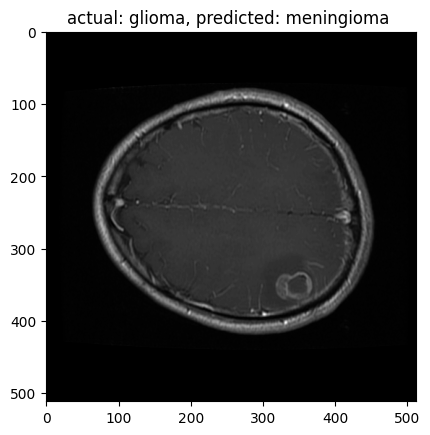

In [108]:
for i in range(len(wrong_examples)):
    plot_wrong_example(wrong_examples[i], X_test, argmax_y_test, images_mask, argmax_model6_predictions, show_mask = True)